# Part A - Task 1
#### Student ID : R00182510

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import h5py
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


2.1.0


In [2]:
def loadDataH5():
        
    # load data from data1.h5
    with h5py.File('/home/jupyter/dataset/data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

In [3]:
def plotAccLoss(H, NUM_EPOCHS):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

### Baseline CNN

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               134218240 
_________________________________________________________________
dense_11 (Dense)             (None, 17)                8721      
Total params: 134,228,753
Trainable params: 134,228,753
Non-trainable params: 0
_________________________________________________________________
None
Training network...
Train on

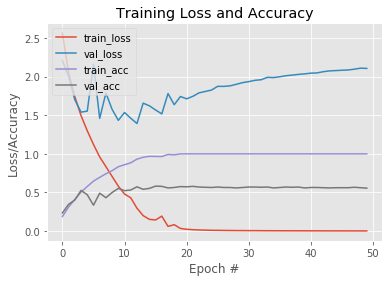

In [9]:

def baselineCNN(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # Single CONV and POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = baselineCNN(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    # Train the model
    print("Training network...")
    H = model.fit(trainX, trainY, batch_size=16, 
                epochs=NUM_EPOCHS, validation_data = (testX, testY))

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

### CNN Network 1

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               16777728  
_______________________________________________

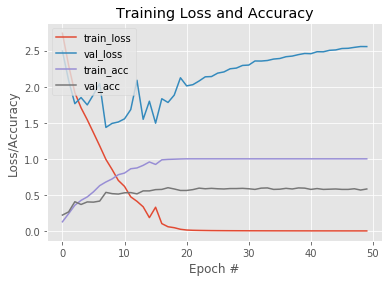

In [10]:
def CNN_Network1(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # Two CONV and POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network1(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    
    # Train the model
    print("Training network...")
    H = model.fit(trainX, trainY, batch_size=16, 
                epochs=NUM_EPOCHS, validation_data = (testX, testY))

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

### CNN Network 2

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 32)        0         
_______________________________________________

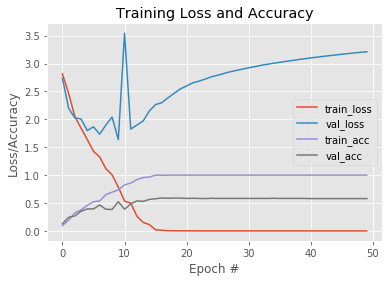

In [11]:
def CNN_Network2(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # 2 stacked double CONV and a POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network2(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    
    # Train the model
    print("Training network...")
    H = model.fit(trainX, trainY, batch_size=16, 
                epochs=NUM_EPOCHS, validation_data = (testX, testY))

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

### CNN Network 3

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
spatial_dropout2d_18 (Spatia (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 64, 64, 32)        9248      
______________________________________________

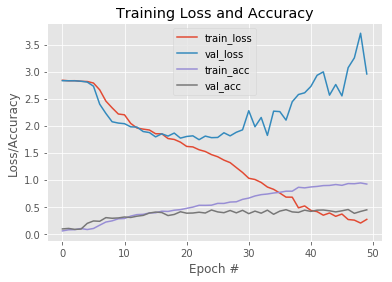

In [15]:
def CNN_Network3(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # 3 stacked double CONV and a POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network4(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    
    # Train the model
    print("Training network...")
    H = model.fit(trainX, trainY, batch_size=16, 
                epochs=NUM_EPOCHS, validation_data = (testX, testY),use_multiprocessing = True)

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

### CNN Network 4

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
spatial_dropout2d_21 (Spatia (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 64, 64, 32)        9248      
______________________________________________

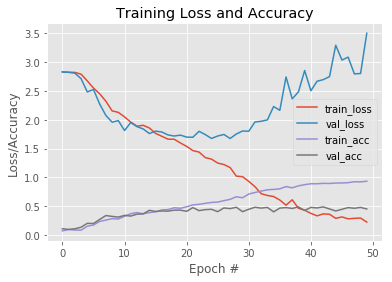

In [16]:
def CNN_Network4(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # 3 stacked double CONV, a POOL layer and a spatial dropout layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.SpatialDropout2D(rate=0.5))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.SpatialDropout2D(rate=0.5))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.SpatialDropout2D(rate=0.5))    
    

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network4(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    # Train the model
    print("Training network...")
    H = model.fit(trainX, trainY, batch_size=16, 
                epochs=NUM_EPOCHS, validation_data = (testX, testY),use_multiprocessing = True)

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

#### Apllying Data Augmentation to CNN network 2

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_______________________________________________

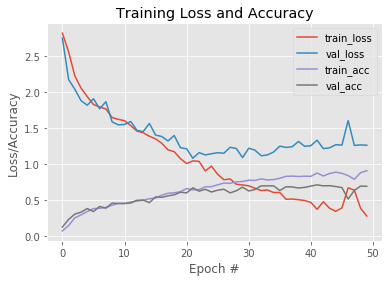

In [8]:
def CNN_Network2(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # 2 stacked double CONV and POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network2(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    
    # Specify the selection methods for data augmentation
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    # Generate augmented images from training set using ImageDataGenerator
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)
    # Train the model    
    print("Training network...")
    H = model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ 16, validation_data = (testX, testY))

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

#### Apllying Data Augmentation to CNN network 3

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 32, 32, 32)        0         
______________________________________________

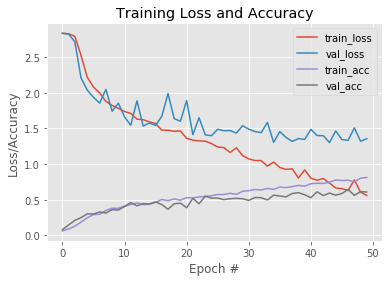

In [17]:
def CNN_Network3(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # 3 stacked double CONV and a POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network3(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    
    # Specify the selection methods for data augmentation
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    # Generate augmented images from training set using ImageDataGenerator
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)
    
    # Train the model
    print("Training network...")
    H = model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ 16, validation_data = (testX, testY))

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()

#### CNN Network2 with data augmentation not including zoom

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 32, 32, 32)        0         
______________________________________________

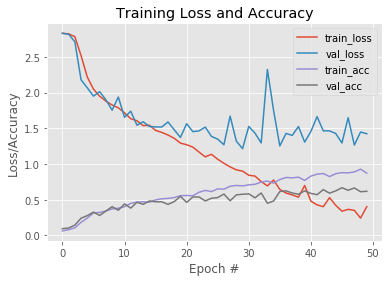

In [19]:
def CNN_Network2(width, height, depth, classes):
  
    model = keras.models.Sequential()

    inputShape = (height, width, depth)


    # 3 stacked double CONV and a POOL layer set
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

    # softmax classifier
    model.add(keras.layers.Dense(classes, activation='softmax'))

    # return the constructed network architecture
    return model



def main():

    NUM_EPOCHS = 50
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]

    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=0.01)
    model = CNN_Network2(width=width, height=height, depth=depth, classes=17)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    print (model.summary())
    
    # Specify the selection methods for data augmentation
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    # Generate augmented images from training set using ImageDataGenerator
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)
    
    # Train the model
    print("Training network...")
    H = model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ 16, validation_data = (testX, testY))

    # plot the training loss and accuracy
    plotAccLoss(H, NUM_EPOCHS)



main()